In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

/Users/vincentleonardo/.virtualenvs/2021-11_Synthesis_Sustainability/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def normalize_z(df):
    return (df-df.mean(axis=0))/df.std(axis=0)

def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    df1 = df_feature
    np1 = df1.to_numpy()
    n = np1.reshape(-1, len(df_feature.columns))
    x = np.concatenate((np.ones((n.shape[0], 1)),n), axis =1)
    return x

def prepare_target(df_target):
    df2 = df_target
    np2 = df2.to_numpy()
    s = np2.reshape(-1, len(df_target.columns))
    return s

def predict(df_feature, beta):
    X = prepare_feature(normalize_z(df_feature))
    return predict_norm(X, beta)

def predict_norm(X, beta):
    return np.matmul(X, beta)
  
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ss_tot = np.sum((y-y_mean)**2)
    ss_res = np.sum((y-ypred)**2)
    return 1-(ss_res/ss_tot)

def mean_squared_error(target, pred):
    n = target.shape[0]
    result = (1/n)*(np.sum((target-pred)**2))
    return result

def compute_cost(X, y, beta):
    m = X.shape[0]
    error = np.matmul(X, beta) - y 
    error_sq = np.matmul(error.T, error)
    J = (1/(2*m))*error_sq
    J = J[0][0]
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    for n in range(num_iters):
        deriv = np.matmul(X.T, (np.matmul(X, beta)-y))
        beta = beta - alpha * (1/m) * deriv
        J_storage[n] = compute_cost(X, y, beta)
    return beta, J_storage

In [3]:
# Read the CSV and extract the features
df = pd.read_csv("Data.csv")
df_feature, df_target = get_features_targets(df, ["Hospital beds per 1000 people", "Population aged 65 and over (%)"], ["Deaths"])

# normalize
df_feature = normalize_z(df_feature)

# Split the data into training and test data set using scikit-learn function
df_feature_train, df_feature_test, df_target_train, df_target_test = train_test_split(df_feature, df_target, random_state=100, test_size=0.3)

# Instantiate LinearRegression() object
model = LinearRegression()

# Call the fit() method
model.fit(df_feature_train, df_target_train)

# Call the predict() method
pred = model.predict(df_feature_test)

In [12]:
print(df_feature_test)

    Hospital beds per 1000 people  Population aged 65 and over (%)
69                      -0.995308                        -0.963856
57                      -1.073762                        -1.111269
35                      -0.089166                         0.657690
21                       0.103046                         0.510277
25                      -0.720720                        -0.374203
77                       1.472066                         1.099930
36                      -1.022767                        -0.669029
37                      -0.822710                        -0.669029
90                      -0.406904                         0.215450
54                      -0.720720                        -1.111269
26                       0.609074                         1.394756
80                      -0.171542                        -1.111269
72                      -0.603039                        -0.374203
28                      -0.328450                        -0.81

In [13]:
print(df_target_test)

    Deaths
69   12896
57     441
35      29
21     231
25    1854
77   20350
36  157157
37   36166
90      83
54    1044
26     589
80    6494
72   46299
28       2
62    3199
29     742
68    1570
33    6393
75   16317
5     8561
43     422
11   11649
81     872
86    1605
85   49993
32    6504
93    8001
22    2362
23    3100
50    2179
89    9966
20     322


ValueError: x and y must be the same size

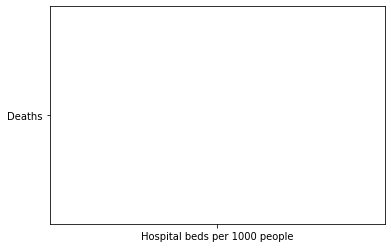

In [10]:
plt.scatter(df_feature_test, df_target_test)
plt.plot(df_feature_test, pred, color="orange")